In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset to a Pandas DataFrame
data=pd.read_csv('creditcard.csv')

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#imformation about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.shape

(284807, 31)

In [7]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This data is highly unbalanced.

In [10]:
#seperating the data for analysis
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Statistical measures of the data

In [13]:

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

From the above command,we got to know that


492 are Fraud transactions


284315 are Normal transactions

<Axes: xlabel='Class'>

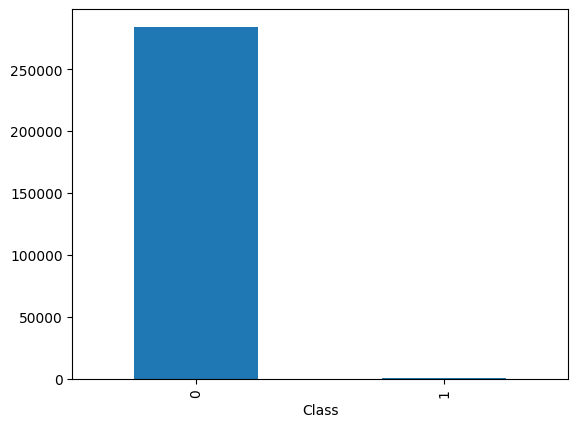

In [47]:
data['Class'].value_counts().plot(kind='bar')

In [17]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Under Sampling

In [21]:
legit_sample=legit.sample(n=492)

In [22]:
new_data=pd.concat([legit_sample,fraud],axis=0)

In [23]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
207194,136562.0,-2.273549,1.070993,0.383546,-0.394994,-0.997628,0.210089,-0.334970,1.348879,-0.213488,...,-0.058560,-0.597645,0.064228,0.356628,0.379748,-0.427749,-0.430182,-0.319946,84.59,0
1646,1271.0,-0.657616,1.035372,2.299142,2.921670,-0.094745,0.895020,0.267126,0.102119,-0.403654,...,0.077563,0.910980,-0.066681,0.130746,-0.286512,0.355410,0.425114,0.043962,33.62,0
250751,155050.0,0.285412,0.837827,-0.421605,-0.568154,0.987699,-0.624011,0.849450,-0.037080,-0.388924,...,-0.196628,-0.554900,0.174315,0.667165,-0.870728,0.008427,0.031762,0.068723,0.99,0
107950,70692.0,1.256365,-0.026588,-1.166640,0.267884,2.182904,3.608145,-0.434329,0.848223,0.172034,...,-0.181251,-0.482714,-0.129778,1.010062,0.891883,-0.327013,0.024659,0.013085,12.00,0
245541,152796.0,2.068557,0.051880,-1.897342,0.192984,0.652464,-0.295019,0.025790,-0.020735,0.367128,...,-0.353222,-0.974485,0.276586,-0.021434,-0.245205,0.186612,-0.071170,-0.047207,0.32,0


In [24]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94689.262195,0.045499,-0.032473,-0.026875,-0.070885,0.024745,0.057484,0.006129,-0.002394,0.037369,...,0.052641,-0.020022,0.030690,0.030223,-0.035263,0.002777,-0.008610,0.008824,-0.004780,96.781220
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Build model

In [26]:
x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

In [27]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
207194,136562.0,-2.273549,1.070993,0.383546,-0.394994,-0.997628,0.210089,-0.334970,1.348879,-0.213488,...,-0.498468,-0.058560,-0.597645,0.064228,0.356628,0.379748,-0.427749,-0.430182,-0.319946,84.59
1646,1271.0,-0.657616,1.035372,2.299142,2.921670,-0.094745,0.895020,0.267126,0.102119,-0.403654,...,0.435908,0.077563,0.910980,-0.066681,0.130746,-0.286512,0.355410,0.425114,0.043962,33.62
250751,155050.0,0.285412,0.837827,-0.421605,-0.568154,0.987699,-0.624011,0.849450,-0.037080,-0.388924,...,-0.125026,-0.196628,-0.554900,0.174315,0.667165,-0.870728,0.008427,0.031762,0.068723,0.99
107950,70692.0,1.256365,-0.026588,-1.166640,0.267884,2.182904,3.608145,-0.434329,0.848223,0.172034,...,-0.031450,-0.181251,-0.482714,-0.129778,1.010062,0.891883,-0.327013,0.024659,0.013085,12.00
245541,152796.0,2.068557,0.051880,-1.897342,0.192984,0.652464,-0.295019,0.025790,-0.020735,0.367128,...,-0.174173,-0.353222,-0.974485,0.276586,-0.021434,-0.245205,0.186612,-0.071170,-0.047207,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [28]:
y

207194    0
1646      0
250751    0
107950    0
245541    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [30]:
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train)

C:\Users\bindhu reddy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
train_prediction=model.predict(x_train)
training_accuracy=accuracy_score(train_prediction,y_train)

In [42]:
training_accuracy

0.9364675984752223

In [43]:
test_prediction=model.predict(x_test)
testing_accuracy=accuracy_score(test_prediction,y_test)

In [45]:
testing_accuracy

0.9289340101522843